Белок [kisspeptin](http://www.uniprot.org/uniprot/Q15726) (metastin), кодируемый геном [Kiss1/KISS1](http://www.genecards.org/cgi-bin/carddisp.pl?gene=KISS1), рассматривается как главный регулятор  полового созревания посредством регуляции гонадолиберина (GnRH). 
У человека при соединении с рецептором GPR54 на поверхности клеточной мембраны блокирует деление и миграцию клеток, т.е. препятствует метастазам при некоторых опухолях. 

В формате FASTA:
```fasta
>sp|Q15726|KISS1_HUMAN Metastasis-suppressor KiSS-1 OS=Homo sapiens GN=KISS1 PE=1 SV=4
MNSLVSWQLLLFLCATHFGEPLEKVASVGNSRPTGQQLESLGLLAPGEQSLPCTERKPAA
TARLSRRGTSLSPPPESSGSPQQPGLSAPHSRQIPAPQGAVLVQREKDLPNYNWNSFGLR
FGKREAAPGNHGRSAGRG
```


[3D модель](https://swissmodel.expasy.org/repository/uniprot/Q15726)


Также обнаружен второй вариант кисспептина Kiss2 с другой кодирующей последовательностью, но с похожей ключевой последовательностью аминокислот.

В статье сравниваются последовательности аминокислот в кисспептинах разных позвоночных.


![](m_zee0020945640002.jpg)

А. Выравнивание аминокислотных последовательностей из последовательности ядра (kisspeptin-10) Kiss1 и kiss2. Консервативные аминокислотные остатки заштрихованы.
B. Филогенетический анализ последовательностей кДНК kiss1 и kiss2. Дерево было построено с использованием метода определения ближайших соседей.

[Kitahashi T., Ogawa S., Parhar I. S. Cloning and expression of kiss2 in the zebrafish and medaka //Endocrinology. – 2009. – Т. 150. – №. 2. – С. 821-831.](https://academic.oup.com/endo/article-lookup/doi/10.1210/en.2008-0940)

In [29]:
%pylab inline
np.set_printoptions(precision=5, suppress=True)

import difflib

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [35]:
D={
    'homo': 'YNWNSFGLRF',
    'mus': 'YNWNSFGLRY',
    'platypus':'YNWNSFGLRY',
    'xenopus': 'YNVNSFGLRF',
    'medaka1': 'YNLNSFGLRY',
    'zf1': 'YNLNSFGLRY',
    'medaka2': 'FNYNPFGLRF',
    'zf2': 'FNYNPFGLRF',
    'fugu': 'FNLNPFGLRF',
    'xenopus2': 'FNFNPFGLRF',
    'platypus2': 'FNFNPFGLRF',
  }

### "Расстояние" между двумя строками 
    
Многие знают игру, как из МУХА сделать СЛОН. За один шаг разрешается менять только одну букву. Эта игра демонстрирует подход для измерения различий между любыми последовательностями символов.

Расстояние между словами измеряется количеством операций редактирования, которые нужны, чтобы из одного слова получить другое. При этом разные варианты таких метрик могут считать прибавление или удаление нескольких символов за одну операцию, или игнорировать пробелы, или не учитывать регистр букв и т.п. Более продвинутые системы распознавания слов учитывают падежные окончания, контекст использования, синонимы и пр. Такие системы используются для исправления запросов в поисковых системах (напр. Яндекс).

In [36]:
(D['homo'],D['mus'])

('YNWNSFGLRF', 'YNWNSFGLRY')

Сравнение строк производится по количеству операций. 

In [37]:
o=difflib.SequenceMatcher(a=D['homo'], b=D['mus'])
o.ratio()

0.9

In [63]:
# определим функцию, которая будет сравнивать два слова
def strcompare(a,b):
    sm=difflib.SequenceMatcher(None, a, b)
    
    #m=sm.find_longest_match(0,11,0,11)
    #print('Наиболее длинная последовательность в словах {} и {}:'.format(a,b))
    
    for block in sm.get_matching_blocks():
        if block[2]:
            print("совпадение из {2} символов в позициях a[{0}] и b[{1}]".format(*block))
    print()
    print('Чтобы получить из {} => {}:'.format(a,b))
    for opcode in sm.get_opcodes():
        print("    {:7s} a[{}:{}] b[{}:{}]".format(*opcode))

    p=sm.ratio()
    print('Сходство {:.1f}%'.format(p*100))
    
    return p

In [64]:
s1='"ТЕРМИНАТОР"'
s2='Терминатор-2'
strcompare(s1,s2)

совпадение из 1 символов в позициях a[1] и b[0]

Чтобы получить из "ТЕРМИНАТОР" => Терминатор-2:
    delete  a[0:1] b[0:0]
    equal   a[1:2] b[0:1]
    replace a[2:12] b[1:12]
Сходство 8.3%


0.08333333333333333

In [65]:
strcompare(s1.lower(), s2.lower())

совпадение из 10 символов в позициях a[1] и b[0]

Чтобы получить из "терминатор" => терминатор-2:
    delete  a[0:1] b[0:0]
    equal   a[1:11] b[0:10]
    replace a[11:12] b[10:12]
Сходство 83.3%


0.8333333333333334

In [66]:
strcompare('Филлип', 'киллер')

совпадение из 3 символов в позициях a[1] и b[1]

Чтобы получить из Филлип => киллер:
    replace a[0:1] b[0:1]
    equal   a[1:4] b[1:4]
    replace a[4:6] b[4:6]
Сходство 50.0%


0.5

Сходные явления в биологии:
- Операция редактирования ~ мутация
- Расстояние между строками ~ возраст общего предка
- Приведение к одному регистру ~ трансляция ДНК в РНК
- Не учитывать окончания (стемминг) ~ вырожденность генетического кода
- Контекст использования ~ гидрофильный/гидрофобный конец, отрицательно/положительно заряженный

## Чем ближе, тем меньше дистанция

In [38]:
D = pd.DataFrame(list(map(list,D.values())), index=D.keys())
D

,0,1,2,3,4,5,6,7,8,9
homo,Y,N,W,N,S,F,G,L,R,F
mus,Y,N,W,N,S,F,G,L,R,Y
platypus,Y,N,W,N,S,F,G,L,R,Y
xenopus,Y,N,V,N,S,F,G,L,R,F
medaka1,Y,N,L,N,S,F,G,L,R,Y
zf1,Y,N,L,N,S,F,G,L,R,Y
medaka2,F,N,Y,N,P,F,G,L,R,F
zf2,F,N,Y,N,P,F,G,L,R,F
fugu,F,N,L,N,P,F,G,L,R,F
xenopus2,F,N,F,N,P,F,G,L,R,F


In [39]:
D=D.applymap(ord)
D

,0,1,2,3,4,5,6,7,8,9
homo,89,78,87,78,83,70,71,76,82,70
mus,89,78,87,78,83,70,71,76,82,89
platypus,89,78,87,78,83,70,71,76,82,89
xenopus,89,78,86,78,83,70,71,76,82,70
medaka1,89,78,76,78,83,70,71,76,82,89
zf1,89,78,76,78,83,70,71,76,82,89
medaka2,70,78,89,78,80,70,71,76,82,70
zf2,70,78,89,78,80,70,71,76,82,70
fugu,70,78,76,78,80,70,71,76,82,70
xenopus2,70,78,70,78,80,70,71,76,82,70


In [40]:
R = pd.DataFrame(squareform(pdist(D, 'hamming')), index=D.index, columns=D.index)
R

,homo,mus,platypus,xenopus,medaka1,zf1,medaka2,zf2,fugu,xenopus2,platypus2
homo,0.0,0.1,0.1,0.1,0.2,0.2,0.3,0.3,0.3,0.3,0.3
mus,0.1,0.0,0.0,0.2,0.1,0.1,0.4,0.4,0.4,0.4,0.4
platypus,0.1,0.0,0.0,0.2,0.1,0.1,0.4,0.4,0.4,0.4,0.4
xenopus,0.1,0.2,0.2,0.0,0.2,0.2,0.3,0.3,0.3,0.3,0.3
medaka1,0.2,0.1,0.1,0.2,0.0,0.0,0.4,0.4,0.3,0.4,0.4
zf1,0.2,0.1,0.1,0.2,0.0,0.0,0.4,0.4,0.3,0.4,0.4
medaka2,0.3,0.4,0.4,0.3,0.4,0.4,0.0,0.0,0.1,0.1,0.1
zf2,0.3,0.4,0.4,0.3,0.4,0.4,0.0,0.0,0.1,0.1,0.1
fugu,0.3,0.4,0.4,0.3,0.3,0.3,0.1,0.1,0.0,0.1,0.1
xenopus2,0.3,0.4,0.4,0.3,0.4,0.4,0.1,0.1,0.1,0.0,0.0


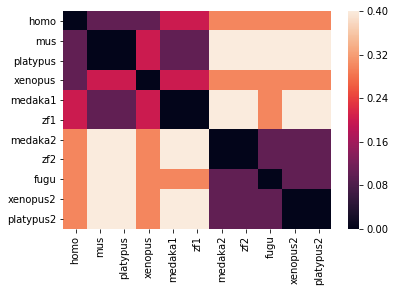

In [41]:
sns.heatmap(R);

In [42]:
Z = linkage(D, 'ward')
Z

array([[ 1.     ,  2.     ,  0.     ,  2.     ],
       [ 4.     ,  5.     ,  0.     ,  2.     ],
       [ 6.     ,  7.     ,  0.     ,  2.     ],
       [ 9.     , 10.     ,  0.     ,  2.     ],
       [ 0.     ,  3.     ,  1.     ,  2.     ],
       [ 8.     , 14.     ,  6.9282 ,  3.     ],
       [11.     , 12.     , 15.55635,  4.     ],
       [13.     , 16.     , 26.33629,  5.     ],
       [15.     , 17.     , 32.08323,  6.     ],
       [18.     , 19.     , 54.74796, 11.     ]])

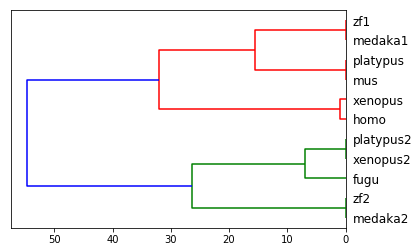

In [49]:
dendrogram(Z, orientation='left', labels=D.index);

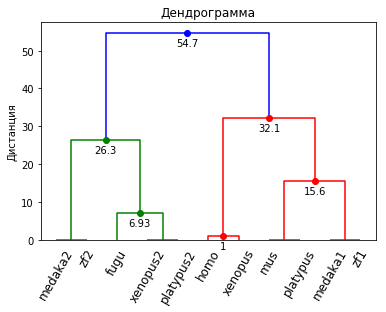

In [62]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Дендрограмма')
        plt.xticks(rotation=60)
#         plt.xlabel('Образец')
        plt.ylabel('Дистанция')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

ddata = fancy_dendrogram(Z, labels=D.index);

In [46]:
max_d = 20
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 4, 4, 3, 4, 4, 1, 1, 2, 2, 2], dtype=int32)

In [70]:
pd.Series(clusters, index=D.index, name='cluster')

homo         3
mus          4
platypus     4
xenopus      3
medaka1      4
zf1          4
medaka2      1
zf2          1
fugu         2
xenopus2     2
platypus2    2
Name: cluster, dtype: int32

Какую надо задать максимальную дистанцию, чтобы выделить только два кластера?

### +++:

В 1990 году предложен новый подход к сравнению последовательностей 
basic local alignment search tool (BLAST),
в котором оптимизируется мера локального сходства и рассчитывается показатель максимально спаренного сегмента (the maximal segment pair (MSP) score). Этот инструмент используется генетиками при выстраивании огромных геномных последовательностей.

[Biopython](http://biopython.org/DIST/docs/tutorial/Tutorial.html) - специальная библиотека для работы с объектами молекулярной биологии.

[Полноценный образец анализа с использованием реальных биологических примеров](http://nbviewer.jupyter.org/github/biocore/scikit-bio-cookbook/blob/master/Alignments%20and%20phylogenetic%20reconstruction.ipynb)
